In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../.venv/lib/python3.9/site-packages/')
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

from coordination.audio.audio import TrialAudio
from coordination.entity.trial import Trial
from coordination.component.speech.vocalics_component import VocalicsComponent, SegmentationMethod
from coordination.plot.vocalics import plot_utterance_durations
from coordination.report.audio_alignment_report import AudioAlignmentReport

In [3]:
trial = Trial.from_directory("../data/study-3_2022/tomcat_agent/trials/T000719")

In [4]:
vocalics_component = VocalicsComponent.from_vocalics(trial.vocalics, SegmentationMethod.KEEP_ALL)

Utterance starting at 2022-06-07T02:07:08.706499+00:00 and ending at 2022-06-07T02:07:09.706499+00:00 is LONG and has flat vocalics. Text:  I'll stay with you
Utterance starting at 2022-06-07T02:07:12.706499+00:00 and ending at 2022-06-07T02:07:13.106500+00:00 is SHORT and has flat vocalics. Text:  there's two
Utterance starting at 2022-06-07T02:08:12.406499+00:00 and ending at 2022-06-07T02:08:12.806500+00:00 is SHORT and has flat vocalics. Text:  I'll take B
Utterance starting at 2022-06-07T02:11:59.034500+00:00 and ending at 2022-06-07T02:11:59.534500+00:00 is SHORT and has flat vocalics. Text:  all right
Utterance starting at 2022-06-07T02:12:11.834500+00:00 and ending at 2022-06-07T02:12:12.134500+00:00 is SHORT and has flat vocalics. Text:  all right
Utterance starting at 2022-06-07T02:12:37.034500+00:00 and ending at 2022-06-07T02:12:37.634500+00:00 is SHORT and has flat vocalics. Text:  yes sir
Utterance starting at 2022-06-07T02:13:34.134500+00:00 and ending at 2022-06-07T02:1

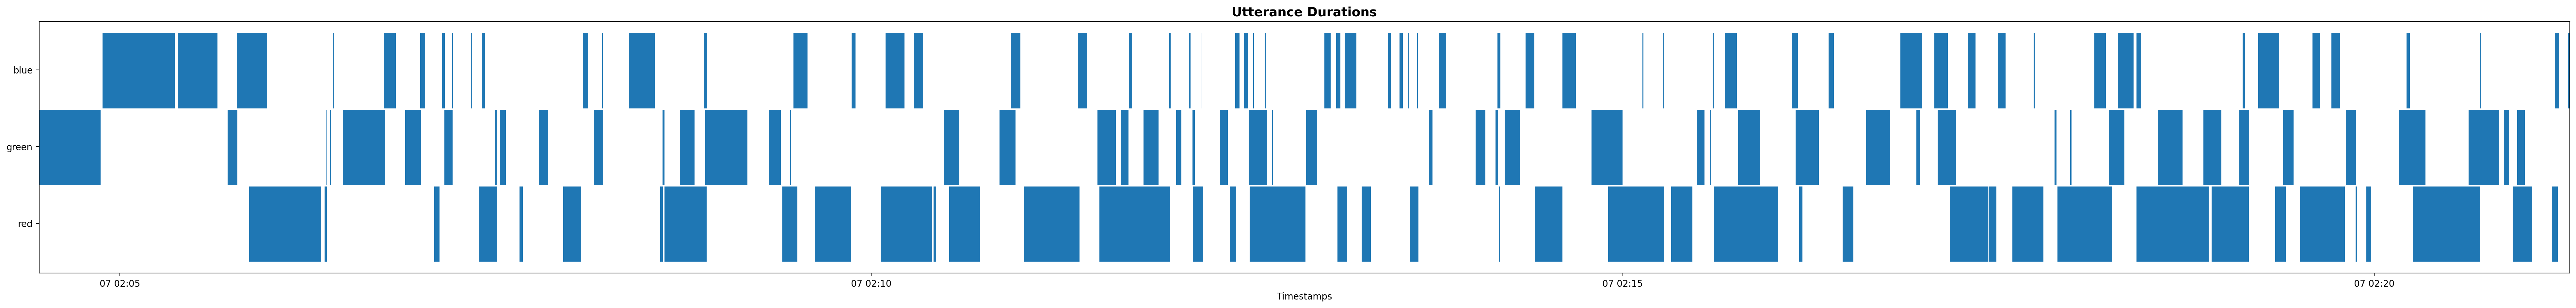

In [5]:
plt.figure(figsize=(50, 5))
plot_utterance_durations(plt.gca(), trial.vocalics.utterances_per_subject)

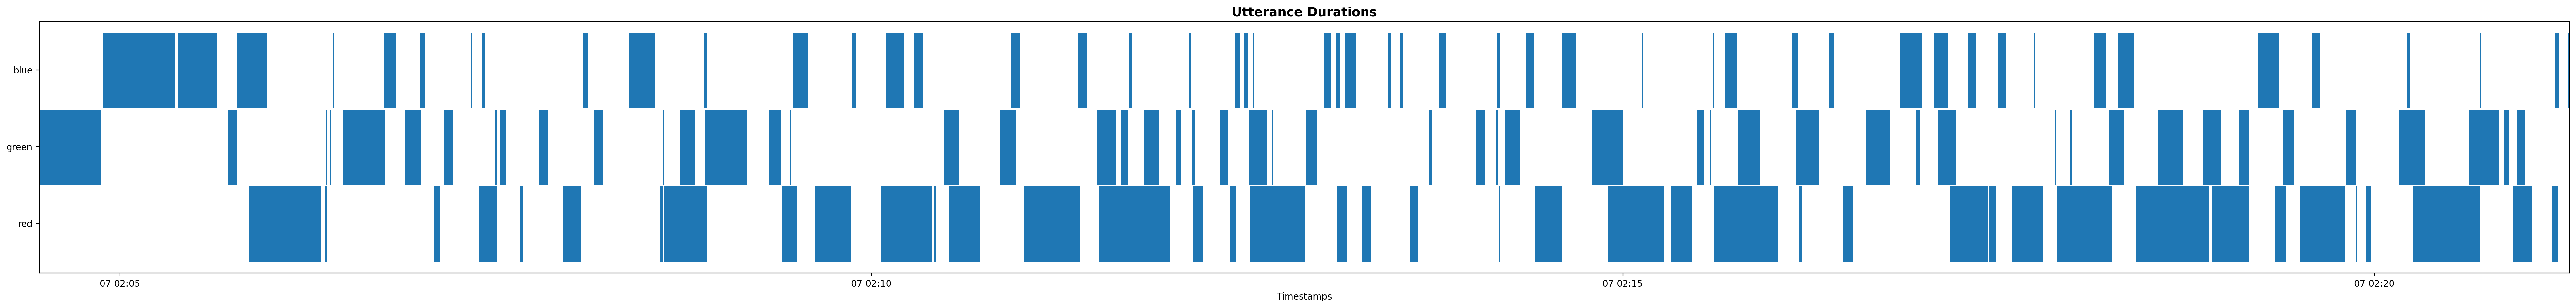

In [6]:
plt.figure(figsize=(50, 5))
vocalics_component.plot_utterance_durations(plt.gca())

In [24]:
import psycopg2

try:
    connection = psycopg2.connect(host="localhost",
                                  port=5432,
                                  database="asist_vocalics")
    query = "SELECT participant, seconds_offset, f0final_sma FROM features WHERE " + \
            "trial_id = %s AND seconds_offset BETWEEN 0 AND 300 ORDER BY participant, seconds_offset"
    cursor = connection.cursor()
    cursor.execute(query, ("90a0e042-00ab-4ab2-9651-092935b5ae4f",)) # T000719
    records = cursor.fetchall()
    
    pitches = {
        "E000888": [],
        "E000931": [],
        "E000940": []
    }
    seconds = {
        "E000888": [],
        "E000931": [],
        "E000940": []
    }
    for participant, offset, pitch in records:
        seconds[participant].append(offset)
        pitches[participant].append(pitch)
except (Exception, psycopg2.Error) as error:
    raise RuntimeError(
        "Error while connecting to the database: " + str(error))

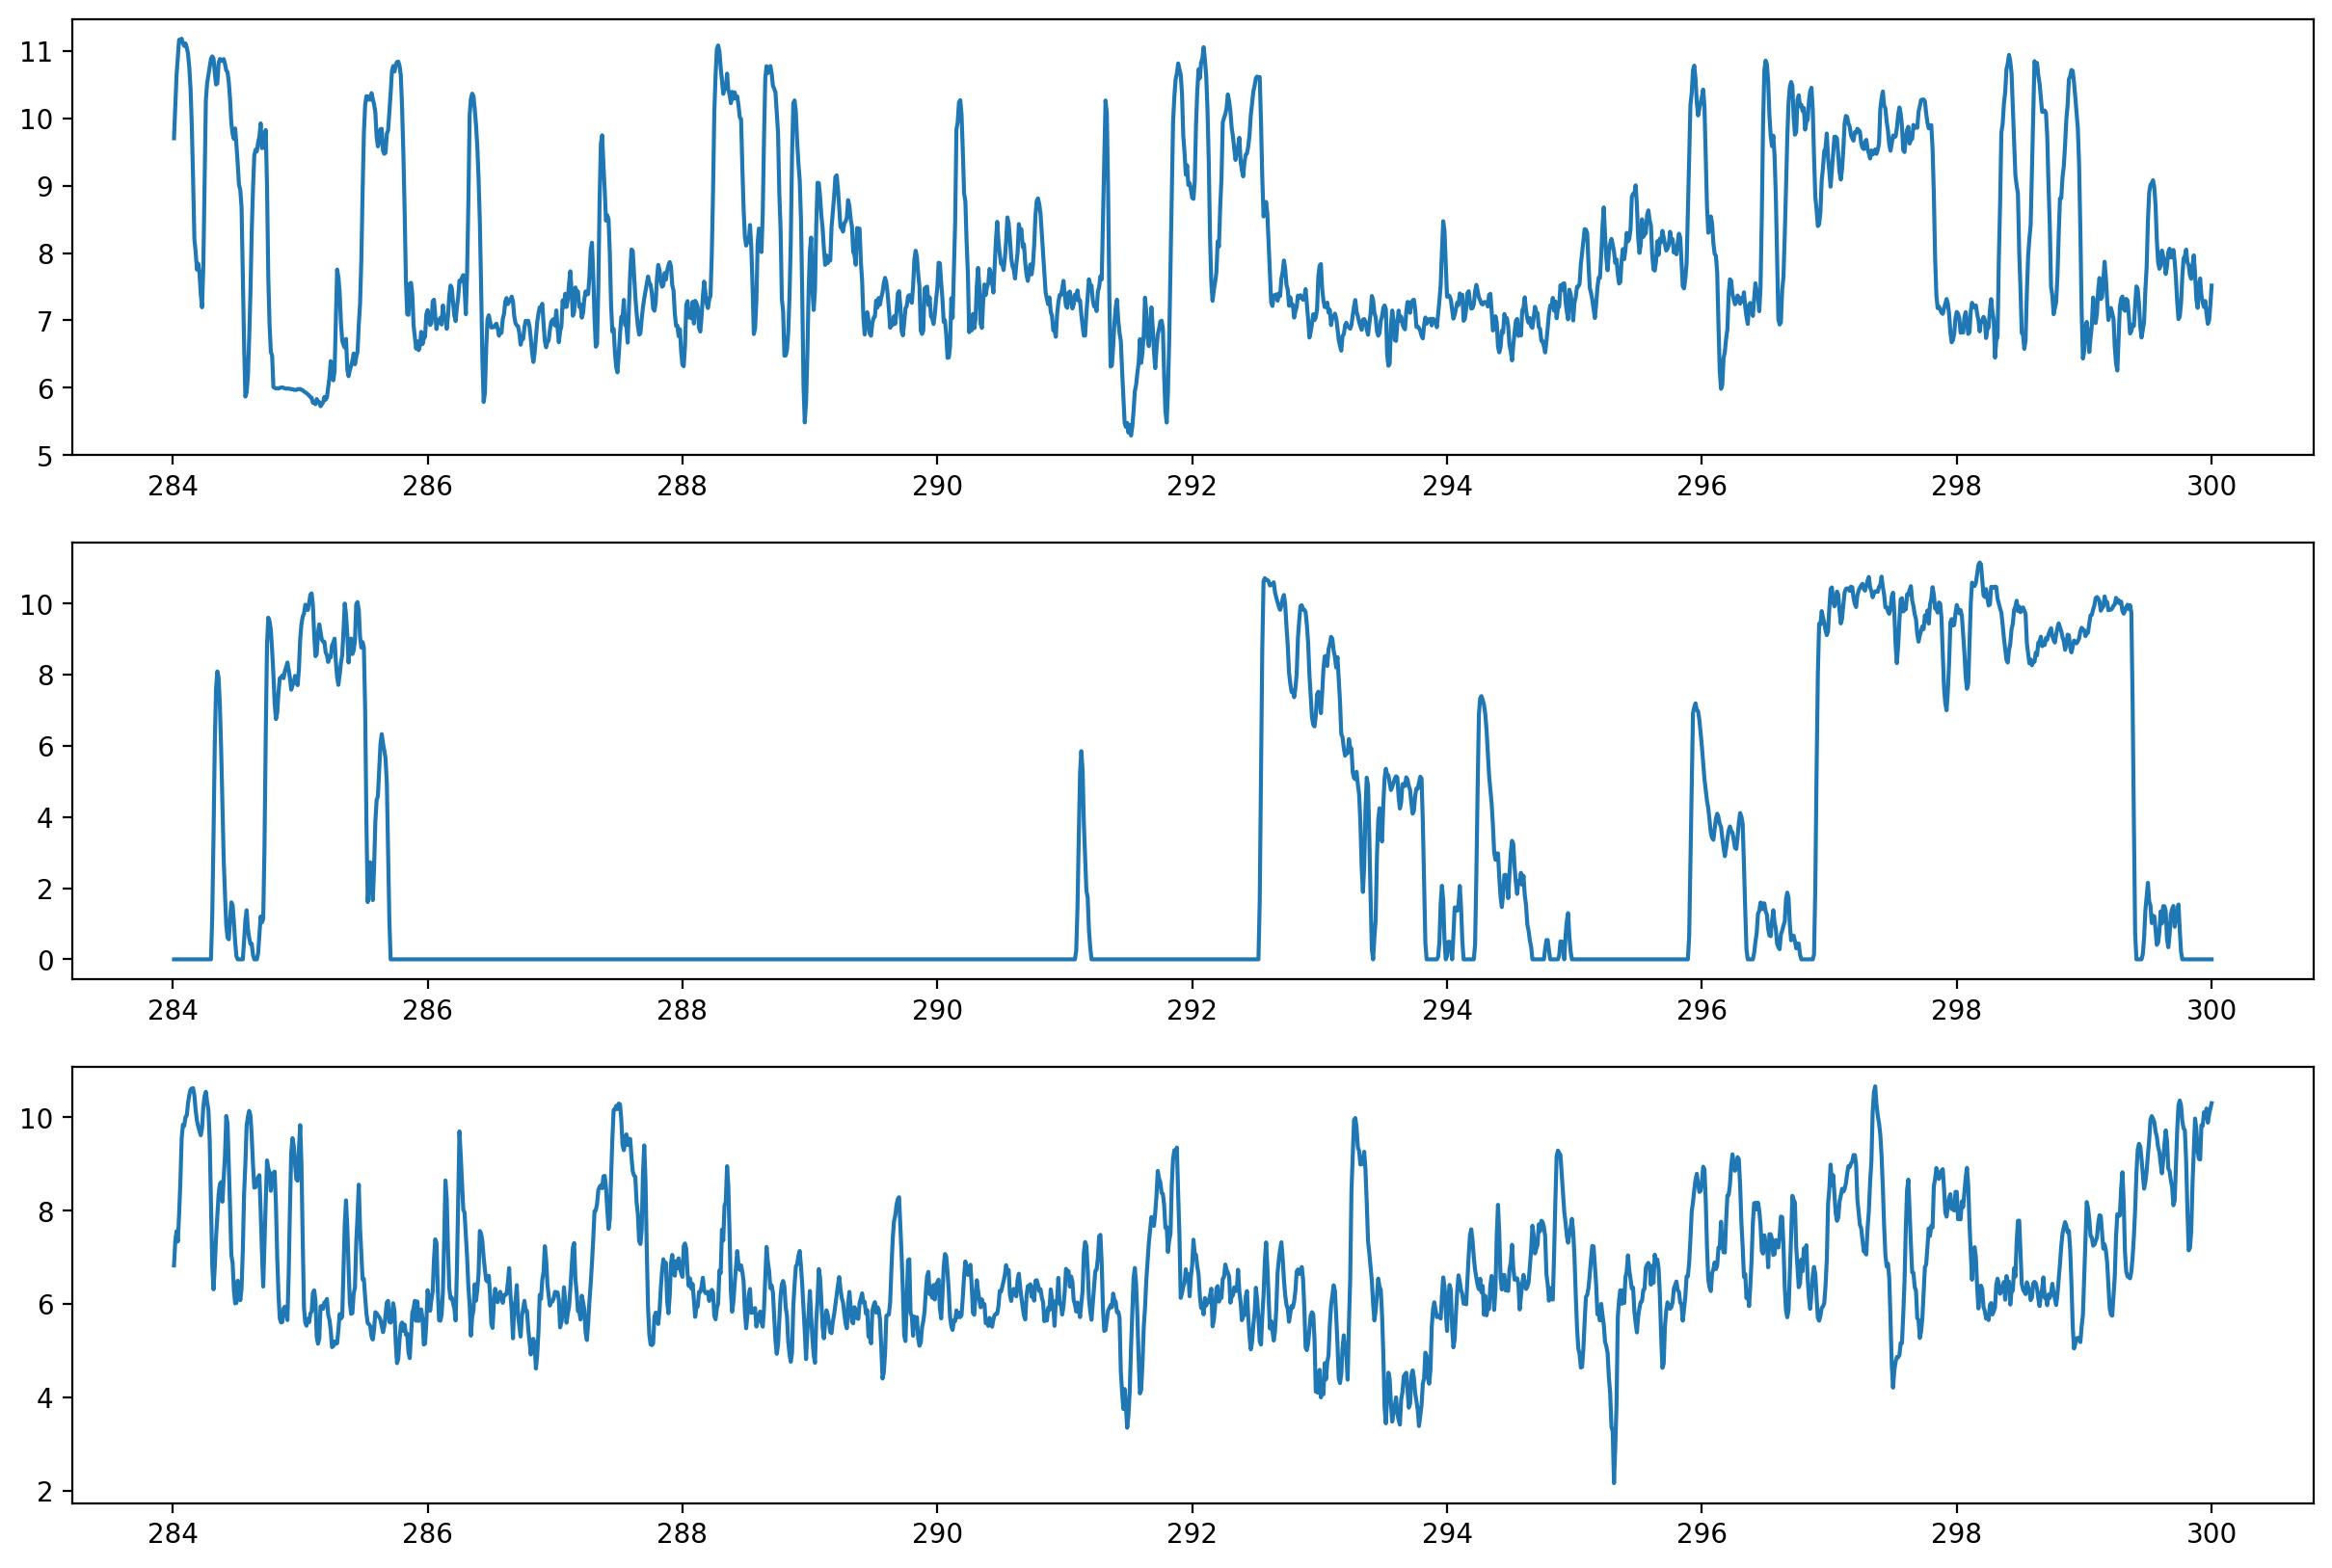

In [45]:
t = 28400
d = 2000
fig, axs = plt.subplots(3, 1, figsize=(15,10))
axs[0].plot(seconds["E000888"][t:t+d], pitches["E000888"][t:t+d])
axs[1].plot(seconds["E000931"][t:t+d], pitches["E000931"][t:t+d])
axs[2].plot(seconds["E000940"][t:t+d], pitches["E000940"][t:t+d])